<a href="https://colab.research.google.com/github/daniel-falk/ai-ml-principles-exercises/blob/colab/ML-training/cv-crash-course/digit_classification_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load and explore the dataset
The dataset used in this exersice is a digit recognition dataset from the *sklearn* library.

In [1]:
import sklearn
import numpy as np
import sklearn.datasets as datasets

In [3]:
data = datasets.load_digits()

In [4]:
data.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

4


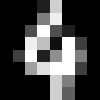

In [5]:
from PIL import Image

i = 100
print(data.target[i])
Image.fromarray((data.images[i] / 16 * 255).astype(np.uint8), "L").resize((100, 100), resample=Image.NEAREST)

In [73]:
# Show the maximum value in any image in the dataset
np.max(data.images)

16.0

In [74]:
# The shape of the images are 8x8 pixels
data.images.shape

(1797, 8, 8)

In [76]:
# Since the model we are going to use it not aware of the spatial layout of the image, we can flatten the fetures like this
data.images.reshape((len(data.images), -1)).shape

(1797, 64)

# Train a model

* Perform a dataset split into training data and test data
* Train a SVM classifier
* Evaluate the classifier

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
flat_dataset = data.images.reshape((len(data.images), -1))
X_train, X_test, y_train, y_test = train_test_split(flat_dataset, data.target, train_size=0.8)

In [77]:
X_train.shape

(1437, 64)

In [78]:
X_test.shape

(360, 64)

4


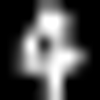

In [12]:
print(y_test[100])
Image.fromarray((X_test[100].reshape((8,8)) / 16 * 255).astype(np.uint8), "L").resize((100,100))

In [13]:
from sklearn import svm

In [14]:
model = svm.SVC(gamma=0.001)
model.fit(X_train, y_train)

SVC(gamma=0.001)

In [80]:
# Predict the first ten samples from the test dataset
model.predict(X_test[0:10])

array([2, 4, 8, 2, 8, 8, 2, 5, 7, 5])

In [81]:
# Show the first ten ground truth values from the test dataset
y_test[0:10]

array([2, 4, 9, 2, 8, 8, 2, 5, 7, 5])

In [82]:
# Compare predicted and true
model.predict(X_test[0:10]) == y_test[0:10]

array([ True,  True, False,  True,  True,  True,  True,  True,  True,
        True])

In [83]:
from sklearn import metrics

predicted = model.predict(X_test)
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        32
           3       1.00      0.96      0.98        49
           4       1.00      1.00      1.00        33
           5       0.97      1.00      0.98        31
           6       1.00      1.00      1.00        35
           7       1.00      1.00      1.00        34
           8       0.96      1.00      0.98        44
           9       1.00      0.97      0.98        33

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



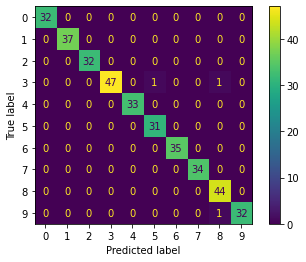

In [84]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)

# Save the model to disk
Save the model persistently so that it can be loaded at a later time in another process for evaluation or inference.

In [21]:
import pickle

In [22]:
with open("model.pkl", "wb") as fio:
  pickle.dump(model, fio)

In [23]:
with open("model.pkl", "rb") as fio:
  mymodel = pickle.load(fio)

In [85]:
# Test that the loaded model is still capabe to predict accurately
mymodel.predict(X_test[:10]) == y_test[:10]

array([ True,  True, False,  True,  True,  True,  True,  True,  True,
        True])

# Perform predictions on images that we have uploaded ourself
Note that you need to draw an image and upload it to the Colab instance before this code works

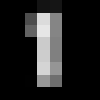

In [86]:
im = Image.open("num-1.jpg").resize((8,8))
im.resize((100,100), resample=Image.NEAREST)

In [87]:
np_im = np.array(im)

In [90]:
# We need to transform this image to the same format as the images in the test and train datasets
preprocessed_img = np_im.astype(np.float32) / 255 * 16

In [91]:
# We also need to flatten it as we did with the training data and expand the "batch" dimension so that we get a list of one image
preprocessed_img.flatten()[None].shape

(1, 64)

In [92]:
model.predict(preprocessed_img.flatten()[None])

array([1])

# Compare our own image to digits from the dataset
If the differnece in look is to significant the model will not be able to correctly predict our own images

In [93]:
np.where(y_test == 1)

(array([ 14,  20,  22,  23,  70,  71,  82,  83,  96,  97, 101, 103, 121,
        123, 132, 134, 138, 139, 147, 163, 168, 177, 194, 203, 219, 220,
        239, 246, 264, 268, 270, 288, 307, 318, 322, 325, 338]),)

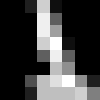

In [94]:
Image.fromarray((X_test[14].reshape((8,8)) / 16 * 255).astype(np.uint8), "L").resize((100,100), resample=Image.NEAREST)